In [1]:
import gzip #Descomprimir
import os 
from os.path import isfile, join #Para saber si un elemento es un archivo o directorio, unir rutas
import numpy as np

In [2]:
def list_files(mnist_path):
    return [join(mnist_path,f) for f in os.listdir(mnist_path) if isfile(join(mnist_path, f))]

In [5]:
mnist_path = r'C:\Users\colve\Documents\DATOS TESIS\mnist_raw'
list_files(mnist_path)

['C:\\Users\\colve\\Documents\\DATOS TESIS\\mnist_raw\\t10k-images-idx3-ubyte.gz',
 'C:\\Users\\colve\\Documents\\DATOS TESIS\\mnist_raw\\t10k-labels-idx1-ubyte.gz',
 'C:\\Users\\colve\\Documents\\DATOS TESIS\\mnist_raw\\train-images-idx3-ubyte.gz',
 'C:\\Users\\colve\\Documents\\DATOS TESIS\\mnist_raw\\train-labels-idx1-ubyte.gz']

In [6]:

def get_images(mnist_path):
    for f in list_files(mnist_path):
        if 'train-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                train_images = data.read()
                x_train = np.frombuffer(train_images, dtype=np.uint8)
                x_train = x_train.reshape((num_images, rows, cols))
        elif 'train-labels' in f:
            with gzip.open(f, 'rb') as data:
                train_labels = data.read()[8:]
                y_train = np.frombuffer(train_labels, dtype=np.uint8)
        if 't10k-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                test_images = data.read()
                x_test = np.frombuffer(test_images, dtype=np.uint8)
                x_test = x_test.reshape((num_images, rows, cols))
        elif 't10k-labels' in f:
            with gzip.open(f, 'rb') as data:
                test_labels = data.read()[8:]
                y_test = np.frombuffer(test_labels, dtype=np.uint8)
    
    return x_train, y_train, x_test, y_test         

In [7]:
x_train, y_train, x_test, y_test = get_images(mnist_path)

In [9]:
x_train.shape

(60000, 28, 28)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')

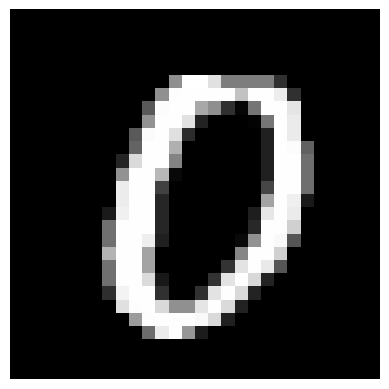

In [58]:
ran_idx = np.random.randint(len(y_test))
plot_number(x_test[ran_idx])